<a href="https://colab.research.google.com/github/nicholasproietti/LGM/blob/TESS/aceess_to_TESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1.1 Install eleanor](#first-bullet)

[1.2 Get the name of stars from table](#second-bullet)

[1.3 Get LC](#third-bullet)

[1.4 ](#fourth-bullet)

# 1.1 Install eleanor <a class="anchor" id="first-bullet"></a>

In [13]:
!pip install eleanor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1.2 Get the name list of stars from table <a class="anchor" id="second-bullet"></a>

In [ ]:
import eleanor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
TESS_table = pd.read_csv('PS_2022.09.29_07.42.37.csv')
TESS_table.shape
print(TESS_table['pl_name'])

0           AU Mic b
1           AU Mic c
2         DS Tuc A b
3          GJ 1252 b
4           GJ 143 b
           ...      
251       WASP-126 c
252       WASP-132 c
253        WASP-18 c
254    WD 1856+534 b
255         pi Men c
Name: pl_name, Length: 256, dtype: object


# 1.3 Get LC <a class="anchor" id="second-bullet"></a>

In [15]:
LC_table = pd.DataFrame([])
LC_time_table = pd.DataFrame([])
pl_name_table = pd.DataFrame([])
for pl_name in TESS_table['pl_name']:
  try:
    star = eleanor.Source(name=pl_name, sector=1)
    data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_pca=True, regressors='corner')
    q = data.quality == 0
  except(TypeError, IndexError, ValueError ):
    print('ingoring star '+ pl_name)
    continue
  else:
    LC = data.raw_flux[q]/np.nanmean(data.raw_flux[q])
    LC_time = data.time[q]
    LC_table.join(pd.DataFrame({pl_name: LC}))
    LC_time_table.join(pd.DataFrame({pl_name: LC_time}))
    print('added '+pl_name+' to table')
    
    


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc.fits with expected size 158022720.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc.fits with expected size 158022720. [astroquery.query]


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4_tess_v2_pm.txt with expected size 238803.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4_tess_v2_pm.txt with expected size 238803. [astroquery.query]
added AU Mic b to table


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc.fits with expected size 158022720.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4_tess_v2_pm.txt with expected size 238803.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-1784-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4_tess_v2_pm.txt with expected size 238803. [astroquery.query]
added AU Mic c to table
ingoring star DS Tuc A b
ingoring star GJ 1252 b


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc.fits with expected size 158022720.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc.fits with expected size 158022720. [astroquery.query]


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-4_tess_v2_pm.txt with expected size 239582.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-4_tess_v2_pm.txt with expected size 239582. [astroquery.query]
added GJ 143 b to table
ingoring star GJ 3090 b
ingoring star GJ 3473 b
ingoring star GJ 357 b
ingoring star GJ 367 b
ingoring star GJ 3929 b
ingoring star HD 108236 b
ingoring star HD 108236 c
ingoring star HD 108236 d
ingoring star HD 108236 e
ingoring star HD 110082 b
ingoring star HD 110113 b


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1784-0808_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1784-0808_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1784-0808_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1784-0808_tess_v2_pc.fits with expected size 158022720.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1784-0808_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1_tess_v2_pm.txt with expected size 237794.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1784-0808_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1784-0808_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1784-0808_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1784-0808_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1784-0808_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1_tess_v2_pm.txt with expected size 237794. [astroquery.query]
added HD 1397 b to table
ingoring star HD 152843 b
ingoring star HD 152843 c
ingoring star HD 15337 b
ingoring star HD 15337 c
ingoring star HD 183579 b
ingoring star HD 191939 b
ingoring star HD 191939 c
ingoring star HD 191939 d


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-0314-0808_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-0314-0808_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-0314-0808_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-0314-0808_tess_v2_pc.fits with expected size 158022720.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-0314-0808_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4_tess_v2_pm.txt with expected size 238803.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-0314-0808_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-0314-0808_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-0314-0808_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-0314-0808_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-1-4-cal-0314-0808_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-1-4_tess_v2_pm.txt with expected size 238803. [astroquery.query]
added HD 202772 A b to table
ingoring star HD 207897 b


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1784-1348_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1784-1348_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1784-1348_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1784-1348_tess_v2_pc.fits with expected size 158022720.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1784-1348_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1784-1348_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1784-1348_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1784-1348_tess_v2_pc.fits with expected size 158022720. [astroquery.query]


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1784-1348_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-1_tess_v2_pm.txt with expected size 239875.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1784-1348_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-1_tess_v2_pm.txt with expected size 239875. [astroquery.query]
added HD 213885 b to table


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc.fits with expected size 158022720.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-4_tess_v2_pm.txt with expected size 239582.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-4-cal-1686-0160_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-4_tess_v2_pm.txt with expected size 239582. [astroquery.query]
added HD 21749 c to table


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-2-cal-0706-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-2-cal-0706-1240_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-2-cal-0706-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-2-cal-0706-1240_tess_v2_pc.fits with expected size 158022720.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-2-cal-0706-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-2-cal-0706-1240_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-2-cal-0706-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-2-cal-0706-1240_tess_v2_pc.fits with expected size 158022720. [astroquery.query]


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-2-cal-0706-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-2_tess_v2_pm.txt with expected size 238686.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-2-cal-0706-1240_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-2_tess_v2_pm.txt with expected size 238686. [astroquery.query]
added HD 219666 b to table
ingoring star HD 221416 b


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc.fits with expected size 158022720.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1_tess_v2_pm.txt with expected size 237847.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1_tess_v2_pm.txt with expected size 237847. [astroquery.query]
added HD 23472 b to table


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc.fits with expected size 158022720.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc.fits with expected size 158022720. [astroquery.query]


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1_tess_v2_pm.txt with expected size 237847.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0314-0106_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1_tess_v2_pm.txt with expected size 237847. [astroquery.query]
added HD 23472 c to table
ingoring star HD 260655 b
ingoring star HD 260655 c


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-2-cal-0902-1942_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-2-cal-0902-1942_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-2-cal-0902-1942_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-2-cal-0902-1942_tess_v2_pc.fits with expected size 158022720.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-2-cal-0902-1942_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-2-cal-0902-1942_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-2-cal-0902-1942_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-2-cal-0902-1942_tess_v2_pc.fits with expected size 158022720. [astroquery.query]


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-2-cal-0902-1942_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-2_tess_v2_pm.txt with expected size 238335.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-2-cal-0902-1942_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-2_tess_v2_pm.txt with expected size 238335. [astroquery.query]
added HD 2685 b to table
ingoring star HD 28109 b
ingoring star HD 28109 c
ingoring star HD 28109 d
ingoring star HD 332231 b


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-0216-1456_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-0216-1456_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-0216-1456_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-0216-1456_tess_v2_pc.fits with expected size 158022720.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-0216-1456_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-0216-1456_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-0216-1456_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-0216-1456_tess_v2_pc.fits with expected size 158022720. [astroquery.query]


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-0216-1456_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3_tess_v2_pm.txt with expected size 241050.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-0216-1456_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3_tess_v2_pm.txt with expected size 241050. [astroquery.query]
added HD 5278 b to table


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1000-1726_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1000-1726_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1000-1726_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1000-1726_tess_v2_pc.fits with expected size 158022720.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1000-1726_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3_tess_v2_pm.txt with expected size 240163.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1000-1726_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1000-1726_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1000-1726_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1000-1726_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1000-1726_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3_tess_v2_pm.txt with expected size 240163. [astroquery.query]
added HD 56414 b to table
ingoring star HD 63433 b
ingoring star HD 63433 c
ingoring star HD 63935 b
ingoring star HD 73583 b
ingoring star HD 73583 c
ingoring star HD 86226 c
ingoring star HD 93963 A b
ingoring star HD 93963 A c
ingoring star HIP 65 A b
ingoring star HIP 67522 b
ingoring star HIP 94235 b
ingoring star HIP 971

INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc.fits with expected size 158022720.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3_tess_v2_pm.txt with expected size 241050.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3_tess_v2_pm.txt with expected size 241050. [astroquery.query]
added TOI-1062 b to table


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc.fits with expected size 158022720.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc.fits with expected size 158022720. [astroquery.query]


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3_tess_v2_pm.txt with expected size 241050.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-3-cal-1392-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-3_tess_v2_pm.txt with expected size 241050. [astroquery.query]
added TOI-1062 c to table
ingoring star TOI-1064 b
ingoring star TOI-1064 c
ingoring star TOI-1075 b
ingoring star TOI-1107 b
ingoring star TOI-1130 b
ingoring star TOI-1130 c
ingoring star TOI-1181 b
ingoring star TOI-1201 b


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1392-1726_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1392-1726_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1392-1726_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1392-1726_tess_v2_pc.fits with expected size 158022720.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1392-1726_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1392-1726_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1392-1726_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1392-1726_tess_v2_pc.fits with expected size 158022720. [astroquery.query]


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1392-1726_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-1_tess_v2_pm.txt with expected size 239875.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-1-cal-1392-1726_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-1_tess_v2_pm.txt with expected size 239875. [astroquery.query]
added TOI-122 b to table
ingoring star TOI-1227 b
ingoring star TOI-1231 b
ingoring star TOI-1235 b
ingoring star TOI-1246 b
ingoring star TOI-1246 c
ingoring star TOI-1246 d
ingoring star TOI-1246 e


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc.fits with expected size 158022720.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc.fits with expected size 158022720. [astroquery.query]


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1_tess_v2_pm.txt with expected size 237794.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1_tess_v2_pm.txt with expected size 237794. [astroquery.query]
added TOI-125 b to table


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc.fits with expected size 158022720.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1_tess_v2_pm.txt with expected size 237794.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1_tess_v2_pm.txt with expected size 237794. [astroquery.query]
added TOI-125 c to table


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc.fits with expected size 158022720.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1_tess_v2_pm.txt with expected size 237794.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-3-1-cal-1196-1996_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-3-1_tess_v2_pm.txt with expected size 237794. [astroquery.query]
added TOI-125 d to table
ingoring star TOI-1259 A b
ingoring star TOI-1260 b
ingoring star TOI-1260 c
ingoring star TOI-1266 b
ingoring star TOI-1266 c
ingoring star TOI-1268 b
ingoring star TOI-1272 b
ingoring star TOI-1278 b
ingoring star TOI-1296 b
ingoring star TOI-1298 b


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-3-cal-1196-0322_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-3-cal-1196-0322_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-3-cal-1196-0322_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-3-cal-1196-0322_tess_v2_pc.fits with expected size 158022720.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-3-cal-1196-0322_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-3_tess_v2_pm.txt with expected size 238150.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-3-cal-1196-0322_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-3-cal-1196-0322_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-3-cal-1196-0322_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-3-cal-1196-0322_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-2-3-cal-1196-0322_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-2-3_tess_v2_pm.txt with expected size 238150. [astroquery.query]
added TOI-132 b to table
ingoring star TOI-1333 b


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-4-cal-0706-1132_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-4-cal-0706-1132_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-4-cal-0706-1132_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-4-cal-0706-1132_tess_v2_pc.fits with expected size 158025600.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-4-cal-0706-1132_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-4-cal-0706-1132_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-4-cal-0706-1132_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-4-cal-0706-1132_tess_v2_pc.fits with expected size 158025600. [astroquery.query]


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-4-cal-0706-1132_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-4_tess_v2_pm.txt with expected size 238457.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-4-cal-0706-1132_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-4_tess_v2_pm.txt with expected size 238457. [astroquery.query]
added TOI-1338 b to table
ingoring star TOI-1411 b
ingoring star TOI-1422 b
ingoring star TOI-1431 b
ingoring star TOI-1442 b
ingoring star TOI-1444 b
ingoring star TOI-1452 b
ingoring star TOI-1478 b
added TOI-150.01 to table
ingoring star TOI-1516 b
added TOI-157 b to table
ingoring star TOI-1601 b
added TOI-163 b to table
ingoring star TOI-1634 b
ingoring star TOI-1670 b
ingoring star TOI-1670 c
ingoring star TOI-1685 b
added TOI-169 b to table
ingoring star TOI-1693 b
ingoring star TOI-1696 b
ingoring star TOI-1710 b
added TOI-172 b to table
ingoring star TOI-1728 b
ingoring star TOI-1749 b
ingoring star TOI-1749 c
ingoring star TOI-1749 d
ingoring star TOI-1759 b
ingoring star TOI-178 b
ingoring star TOI-178 c
ingoring star TOI-178 d
ingoring star TOI-178 e
ingoring star T

INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-1000-1510_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-1000-1510_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-1000-1510_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-1000-1510_tess_v2_pc.fits with expected size 158022720.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-1000-1510_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-1000-1510_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-1000-1510_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-1000-1510_tess_v2_pc.fits with expected size 158022720. [astroquery.query]


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-1000-1510_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1_tess_v2_pm.txt with expected size 237847.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-1000-1510_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1_tess_v2_pm.txt with expected size 237847. [astroquery.query]
added TOI-216.02 to table
ingoring star TOI-2180 b
added TOI-2184 b to table
ingoring star TOI-2193 A b
ingoring star TOI-2196 b
added TOI-220 b to table
added TOI-2202 b to table
ingoring star TOI-2207 b
ingoring star TOI-2236 b
ingoring star TOI-2257 b
ingoring star TOI-2260 b
ingoring star TOI-2285 b
ingoring star TOI-2337 b
ingoring star TOI-237 b
ingoring star TOI-2406 b
ingoring star TOI-2411 b
ingoring star TOI-2421 b
ingoring star TOI-2427 b
ingoring star TOI-2445 b
ingoring star TOI-251 b
ingoring star TOI-2567 b
ingoring star TOI-257 b
ingoring star TOI-2570 b
ingoring star TOI-2669 b
ingoring star TOI-269 b
ingoring star TOI-270 b
ingoring star TOI-270 c
ingoring star TOI-270 d
ingoring star TOI-3331 A b
ingoring star TOI-3362 b
ingoring star TOI-3540 A b
ingoring st

INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc.fits with expected size 158022720.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3_tess_v2_pm.txt with expected size 240163.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3_tess_v2_pm.txt with expected size 240163. [astroquery.query]
added TOI-700 c to table


INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_bkg.fits with expected size 78955200.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc.fits with expected size 158022720.
INFO:astroquery:Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3_tess_v2_pm.txt with expected size 240163.


INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-3-cal-1882-1672_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-3_tess_v2_pm.txt with expected size 240163. [astroquery.query]
added TOI-700 d to table
ingoring star TOI-712 b
ingoring star TOI-712 c
ingoring star TOI-712 d
ingoring star TOI-763 b
ingoring star TOI-763 c
ingoring star TOI-776 b
ingoring star TOI-776 c
added TOI-813 b to table
ingoring star TOI-824 b
ingoring star TOI-833 b
ingoring star TOI-837 b
ingoring star TOI-849 b
ingoring star 

In [16]:

star = eleanor.Source(name='TOI-824 b', sector=1)

IndexError: ignored

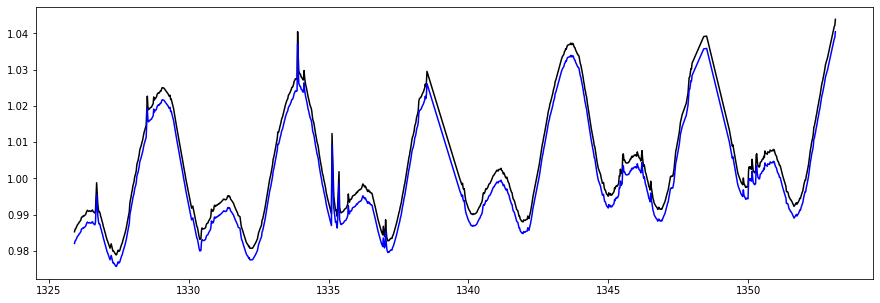

In [48]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 'k')
plt.plot(data.time[q], data.raw_flux[q]/np.nanmean(data.raw_flux[q]), 'b')